## Carga de base de datos
Anuncios de inmuebles de alquiler turístico en las principales plataformas.

#### Importación de bibliotecas

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Conexión a MySQL

In [ ]:
def get_database(host, user, password, database):
    try:
        cnx = mysql.connector.connect(
            host = host,
            user = user,
            password = password,
            database = database
        )

        if cnx.is_connected():
            print(f'Se conectó a la base de datos "{database}" en MySQL')

        cursor = cnx.cursor()
        cursor.execute('SHOW TABLES;')
        
        tables = cursor.fetchall()
        table_names = [table[0] for table in tables]

        print(f'Tablas encontradas: {table_names}.')

        db = {}

        for table in table_names:
            query = f'SELECT * FROM {table};'
            db[table] = pd.read_sql(query, con = cnx) 
        return db

    except mysql.connector.Error as error:
        print(f'Error: {error}')
        return None

    finally:
        if cnx.is_connected():
            cnx.close()
            print('Conexión a MySQL cerrada.')


def rename_dfs():
    for table, df in db.items():
        globals()[table] = df
        print(f'Se creó el dataframe "{table}"')

if __name__ == '__main__':
    host = '212.227.90.6'
    user = 'EquipoE'
    password = 'E1q2u3i4p5oE'
    database = 'Equip_E'

    db = get_database(host, user, password, database)
    rename_dfs()


Se conectó a la base de datos "Equip_E" en MySQL
Tablas encontradas: ['Tourist_Accommodation', 'Tourist_Accommodation10032025'].


C:\Users\Evelyn\AppData\Local\Temp\ipykernel_19168\3597080797.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  db[table] = pd.read_sql(query, con = cnx)


Conexión a MySQL cerrada.
Se creó el dataframe "Tourist_Accommodation"
Se creó el dataframe "Tourist_Accommodation10032025"


## Exploración inicial

In [3]:
# se carga como df la TABLA MÁS RECIENTE
df = Tourist_Accommodation10032025
pd.set_option('display.max_columns', None) # ver todas las columnas
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,1.0,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.0,3,365,VERDADERO,7,20,40,130,78,02/01/2010,05/09/2017,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,1.0,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.0,4,40,VERDADERO,0,0,0,162,33,10/10/2014,15/07/2018,920.0,90.0,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,2.0,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.0,2,120,VERDADERO,26,31,31,270,148,05/01/2011,22/07/2019,980.0,100.0,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,1.0,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.0,2,730,VERDADERO,9,23,49,300,292,13/03/2012,04/01/2020,940.0,100.0,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,5.0,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.0,1,180,VERDADERO,0,19,49,312,36,08/07/2011,08/08/2018,970.0,100.0,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019


### Tamaño

In [6]:
df.shape

(15000, 35)

### Tipos de datos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 15000 non-null  int64  
 1   name                         14996 non-null  object 
 2   description                  14790 non-null  object 
 3   host_id                      15000 non-null  int64  
 4   neighbourhood_name           15000 non-null  object 
 5   neighbourhood_district       9111 non-null   object 
 6   room_type                    15000 non-null  object 
 7   accommodates                 15000 non-null  int64  
 8   bathrooms                    14885 non-null  object 
 9   bedrooms                     14893 non-null  object 
 10  beds                         14940 non-null  float64
 11  amenities_list               14975 non-null  object 
 12  price                        14622 non-null  float64
 13  minimum_nights  

#### Corrección de tipos de datos

In [10]:
# conversión a numérico
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')

# conversión a booleano
df['has_availability'] = df['has_availability'].replace({'VERDADERO': True}).fillna(False)
df['has_availability'] = df['has_availability'].astype(bool)

df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
df['is_instant_bookable'] = df['is_instant_bookable'].astype(bool)

# conversión a fechas
df["first_review_date"] = pd.to_datetime(df["first_review_date"], errors="coerce")
df["last_review_date"] = pd.to_datetime(df["last_review_date"], errors="coerce")
df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 15000 non-null  int64         
 1   name                         14996 non-null  object        
 2   description                  14790 non-null  object        
 3   host_id                      15000 non-null  int64         
 4   neighbourhood_name           15000 non-null  object        
 5   neighbourhood_district       9111 non-null   object        
 6   room_type                    15000 non-null  object        
 7   accommodates                 15000 non-null  int64         
 8   bathrooms                    14885 non-null  float64       
 9   bedrooms                     14893 non-null  float64       
 10  beds                         14940 non-null  float64       
 11  amenities_list               14975 non-nu

C:\Users\Evelyn\AppData\Local\Temp\ipykernel_19168\3580156214.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_instant_bookable'] = df['is_instant_bookable'].replace({'VERDADERO': True, 'FALSO': False})
C:\Users\Evelyn\AppData\Local\Temp\ipykernel_19168\3580156214.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["insert_date"] = pd.to_datetime(df["insert_date"], errors="coerce")


### Duplicados

In [12]:
df.duplicated().sum()

np.int64(5000)

### Análisis estadísticos y outliers


 Distribución Variables Numéricas:

                               Media  Desviación estándar  Mínimo  Q1 (25%)  Mediana  Q3 (75%)   Máximo
accommodates                    4.27                 2.58     1.0       2.0      4.0       6.0     29.0
bathrooms                       1.60                 0.99     0.0       1.0      1.0       2.0     13.0
bedrooms                        1.93                 1.34     0.0       1.0      2.0       3.0     50.0
beds                            2.92                 2.26     0.0       1.0      2.0       4.0     30.0
price                        1024.61               990.07    60.0     450.0    750.0    1240.0  28571.0
minimum_nights                  4.96                18.51     1.0       1.0      2.0       4.0   1125.0
maximum_nights                759.17               498.38     1.0      62.0   1125.0    1125.0   1125.0
availability_30                12.93                11.81     0.0       0.0     11.0      26.0     30.0
availability_60            

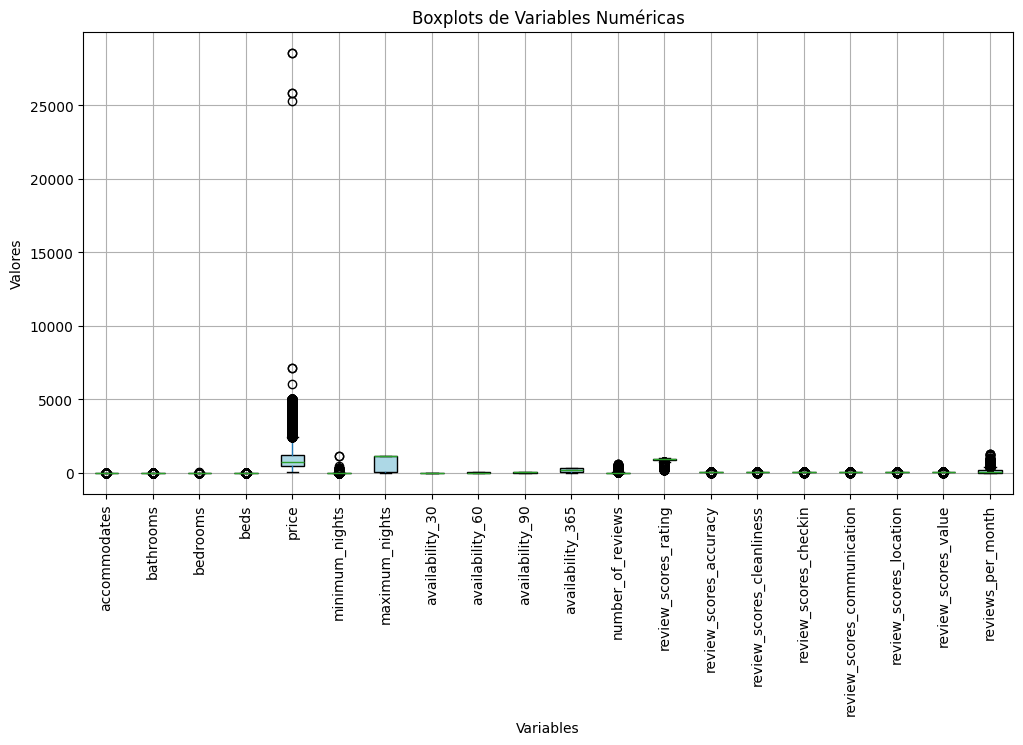

In [13]:
# Filtrar solo variables numéricas
df_numericas = df.select_dtypes(include=[np.number]).drop(columns=['apartment_id', 'host_id'],errors = 'ignore')

# Calcular estadísticas básicas
estadisticas = df_numericas.describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
estadisticas.columns = ['Media', 'Desviación estándar', 'Mínimo', 'Q1 (25%)', 'Mediana', 'Q3 (75%)', 'Máximo']

# Redondear a dos decimales
estadisticas = estadisticas.round(2)

# Mostrar estadísticas
print("\n Distribución Variables Numéricas:\n")
print(estadisticas.to_string())

# Crear boxplots de todas las variables numéricas
plt.figure(figsize=(12, 6))
df_numericas.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplots de Variables Numéricas")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

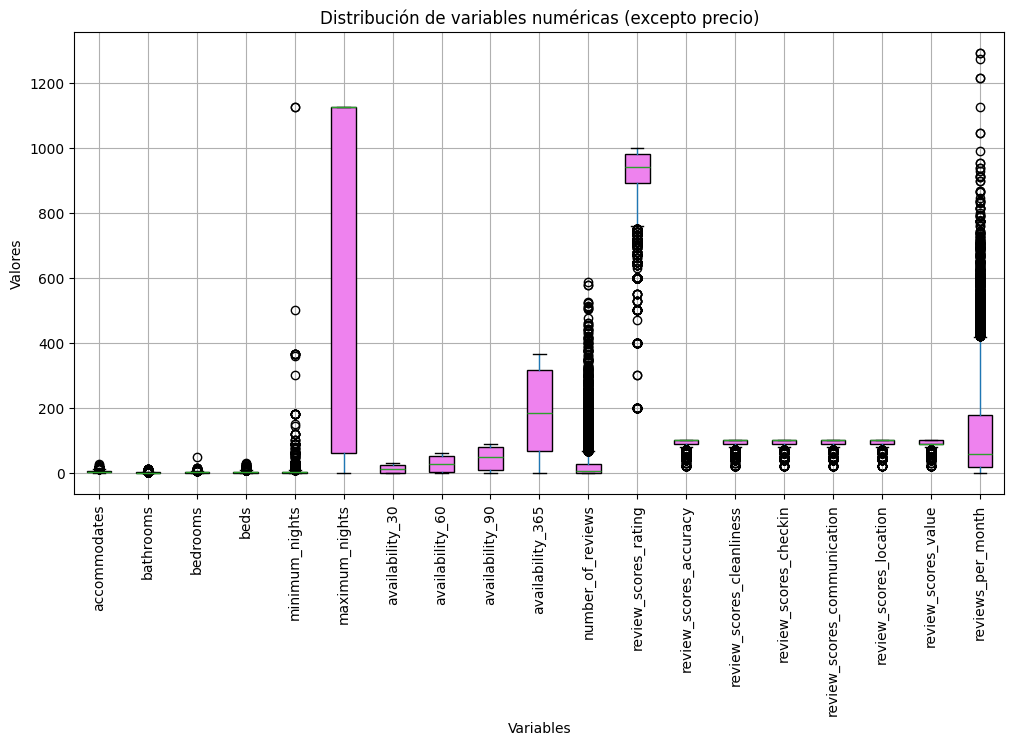

In [ ]:
# nuevo gráfico sin precio vara visualizar mejor las demás variables

df_no_price = df_numericas.drop('price', axis=1)
plt.figure(figsize=(12, 6))
df_no_price.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="violet"))
plt.title("Distribución de variables numéricas (excepto precio)")
plt.xlabel("Variables")
plt.ylabel("Valores")
plt.grid(True)
plt.show()

## Limpieza de datos (Data Cleaning)

### Tratamiento de duplicados

In [20]:
registros_totales = len(df)

duplicados = df['apartment_id'].duplicated().sum()

print(f'Total de registros del dataset: {registros_totales}')
print(f'Total de duplicados exactos: {df.duplicated().sum()}')
print(f"El número de apartment_id duplicados es: {duplicados}")

Total de registros del dataset: 15000
Total de duplicados exactos: 5000
El número de apartment_id duplicados es: 5350


In [ ]:
# Filtar las filas con apartment_id duplicados
duplicados_filas = df[df['apartment_id'].duplicated(keep=False)]

# Mostrar las filas duplicadas
duplicados_filas.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wireless Internet,Wheelchair accessible,Elevat...",470.0,2,365,VERDADERO,22,52,82,357,32,04/07/2011,04/08/2016,870.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,42.0,spain,barcelona,12/09/2017
23,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,1.0,"Wifi,Wheelchair accessible,Elevator,Heating,Fa...",490.0,2,365,VERDADERO,19,49,79,354,34,04/07/2011,15/08/2018,880.0,80.0,90.0,90.0,90.0,90.0,80.0,FALSO,38.0,spain,barcelona,10/10/2018
24,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",NaN,7,90,VERDADERO,27,57,87,362,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,2.0,spain,girona,30/04/2020
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,8.0,"TV,Air conditioning,Pool,Kitchen,Free parking ...",5000.0,7,60,VERDADERO,26,56,86,361,1,18/08/2015,18/08/2015,800.0,80.0,100.0,100.0,100.0,80.0,80.0,FALSO,3.0,spain,girona,30/08/2018
50,343864,3 BD APT IN THE HEART OF GRACIA,A spacious and comfortable 3 bedrooms apartmen...,1744516,la Vila de Gr�cia,Gr�cia,Entire home/apt,6,2,3,5.0,"TV,Wireless Internet,Kitchen,Buzzer/wireless i...",1390.0,2,1125,None,9,28,58,333,4,17/06/2014,07/03/2017,950.0,100.0,100.0,100.0,90.0,100.0,90.0,FALSO,11.0,spain,barcelona,05/06/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9759,42922000,Hostal Bruselas Hab. #7 con ba�o privado y balc�n,Hostal Bruselas se encuentra en el Centro de M...,335917627,Centro,None,Private room,2,1,1,1.0,"Breakfast, Essentials, Hangers, Shampoo, Wifi,...",360.0,2,1125,VERDADERO,30,60,90,90,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,malaga,30/11/2020
9788,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"TV,Wifi,Air conditioning,Kitchen,Heating,Washe...",1070.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,17/04/2020
9789,43193627,Recoletos IX,"Consta de dos dormitorios, dos ba�os, un aseo ...",247570318,Recoletos,Salamanca,Entire home/apt,4,3,2,3.0,"Iron, TV, Hangers, Smoke alarm, Heating, Air c...",1080.0,30,1125,VERDADERO,30,60,90,365,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSO,NaN,spain,madrid,06/11/2020
9852,43897607,Finca rural Els Ametllers,Hermosa Villa rural en Finca de almendros y ol...,351241882,Inca,None,Entire home/apt,8,2,3,5.0,"Smoke alarm, Oven, Extra pillows and blankets,...",1820.0,5,1125,VERDADERO,23,53,83,323,0,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,19/09/2020


#### Eliminación de duplicados con función de reemplazo

In [12]:
def resolver_duplicados(df, id_col, date_col):
    """
    Conserva el duplicado más antiguo, elimina el más reciente,
    pero antes completa los valores faltantes del antiguo con los valores del más reciente.
    Devuelve el df sin duplicados y un resumen de los cambios
    """

    df = df.copy()  # para no modificar el df original
    resumen = []

    grupos_duplicados = df[df.duplicated(subset=[id_col], keep=False)]

    for value, group in grupos_duplicados.groupby(id_col):
        if len(group) > 1:
            # ordena por fecha
            group = group.sort_values(by=date_col, ascending=True)
            earliest_index = group.index[0]
            latest_index = group.index[1]

            # completa valores vacíos
            actualizacion = {}
            for col in df.columns:
                if pd.isna(df.at[earliest_index, col]) and not pd.isna(df.at[latest_index, col]):
                    df.at[earliest_index, col] = df.at[latest_index, col]
                    actualizacion[col] = df.at[latest_index, col]

            # si se actualizó, se guarda
            if actualizacion:
                resumen.append({
                    "ID": value,
                    "índice del registro antiguo": earliest_index,
                    "índice del registro eliminado": latest_index,
                    "columnas actualizadas": actualizacion
                })

            # eliminar el registro reciente
            df.drop(index=latest_index, inplace=True)

    resumen_df = pd.DataFrame(resumen)

    return df, resumen_df

df_sin_duplicados, duplicados_borrados = resolver_duplicados(df, id_col='apartment_id', date_col='insert_date')

In [ ]:
df = df_sin_duplicados

#  se eliminan duplicados y se verifican los cambios 
duplicados_borrados

,ID,índice del registro antiguo,índice del registro eliminado,columnas actualizadas
0,157327,24,25,{'price': 5000.0}
1,343864,50,51,{'has_availability': 'VERDADERO'}
2,1624014,471,470,{'has_availability': 'VERDADERO'}
3,1895368,515,516,{'has_availability': 'VERDADERO'}
4,2450287,614,615,{'bedrooms': '0'}
5,3163230,759,758,{'has_availability': 'VERDADERO'}
6,3559666,839,838,{'has_availability': 'VERDADERO'}
7,3770072,879,878,{'has_availability': 'VERDADERO'}
8,5080749,1087,1088,"{'first_review_date': '27/10/2018', 'last_revi..."
9,5121791,1096,1095,{'amenities_list': ']'}


#### Recuento de duplicados restantes 

In [14]:
conteo_duplicados = df["apartment_id"].value_counts()
duplicados = conteo_duplicados[conteo_duplicados > 1]
duplicados

apartment_id
13966456    2
10005342    2
14582385    2
10713417    2
14326808    2
15402794    2
24038577    2
32161182    2
Name: count, dtype: int64

### Valores nulos

In [18]:
df.isnull().sum()

apartment_id                       0
name                               4
description                      210
host_id                            0
neighbourhood_name                 0
neighbourhood_district          5889
room_type                          0
accommodates                       0
bathrooms                        115
bedrooms                         107
beds                              60
amenities_list                    25
price                            378
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
first_review_date              10334
last_review_date               10419
review_scores_rating            4040
review_scores_accuracy          4053
review_scores_cleanliness       4044
review_scores_checkin           4062
r

#### Eliminación de columnas irrelevantes

In [ ]:
df = df.drop(columns=['description', 'country'])

#### Reviews_per_month

In [ ]:
df_nulos = df[df['reviews_per_month'].isna()]
df_nulos[['reviews_per_month','number_of_reviews']].tail(10)

,reviews_per_month,number_of_reviews
9988,NaN,0
9990,NaN,0
9991,NaN,0
9992,NaN,0
9994,NaN,0
9995,NaN,0
9996,NaN,0
9997,NaN,0
9998,NaN,0
9999,NaN,0


Se observa que la mayoría de los valores nulos en reviews_per_month están justificados, ya que corresponden a alojamientos que no han recibido ninguna reseña.

#### Reviews

In [18]:
# Averiguar si hay algún valor nulo con reseña
print((df_nulos['number_of_reviews'] > 0).any())

True


In [19]:
# Crear tabla de aquellos nulos con reseñas
df_nulos_filtrados = df_nulos[df_nulos['number_of_reviews'] > 0]
df_nulos_filtrados[['name', 'number_of_reviews', 'reviews_per_month']]

,name,number_of_reviews,reviews_per_month
4985,Club Villamar - Gomez,1,NaN
5213,Single room luminous Sagrada Familia WIFI new ...,1,NaN
6393,Habitacion para disfrutar un descanso conforta...,1,NaN


Existen 3 alojamientos que tienen 1 review, pero presentan valores nulos en reviews_per_month.

In [20]:
# Analisis del resto de columnas de reviews

# Seleccionar solo las columnas de interés
cols_reviews = [
    'first_review_date', 'last_review_date', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Filtrar filas donde TODAS las columnas están nulas
df_todas_nulas = df[df[cols_reviews].isnull().all(axis=1)]

# Filtrar filas donde ALGUNA columna está nula, pero no todas
df_parcialmente_nulas = df[df[cols_reviews].isnull().any(axis=1) & ~df[cols_reviews].isnull().all(axis=1)]

# Mostrar el número de filas en cada caso
print(f"Filas con nulos en TODAS las columnas: {len(df_todas_nulas)}")
print(f"Filas con nulos en ALGUNAS columnas, pero no en todas: {len(df_parcialmente_nulas)}")

Filas con nulos en TODAS las columnas: 2521
Filas con nulos en ALGUNAS columnas, pero no en todas: 126


In [21]:
# Verificar si todas las filas en df_todas_nulas tienen number_of_reviews == 0
todas_nulas_son_cero = (df_todas_nulas['number_of_reviews'] == 0).all()

print(f"¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: {todas_nulas_son_cero}")

¿Todas las filas con valores nulos en 'cols_reviews' tienen 'number_of_reviews' igual a 0?: False


#### Neighbourhood_district

In [24]:
# Imputación de valores nulos en 'neighbourhood_district' utilizando la moda de 'neighbourhood_name' filtrando por 'city'.

df['neighbourhood_district'] = df.groupby(['city', 'neighbourhood_name'])['neighbourhood_district'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Desconocido")
)

#### Características numéricas del alojamiento
Se sustituyen los nulos por 1, bajo el entendido de que en todos los alojamientos por defecto hay 1 cama, 1 baño y aloja a al menos a 1 persona.

In [ ]:
df[['beds', 'bathrooms', 'bedrooms']] = df[['accommodates', 'bathrooms', 'bedrooms']].fillna(1)

#### Precio

In [26]:
# Reemplazar los nulos en 'price' con la mediana del 'price' según 'room_type'
df['price'] = df.groupby('room_type')['price'].transform(lambda x: x.fillna(x.median()))

#### Columnas de texto

In [ ]:
df["name"].fillna("Desconocido", inplace=True)
df['amenities_list'] = df['amenities_list'].fillna("Sin información")

#### Verificación

In [28]:
df.isnull().sum()

apartment_id                      0
name                              3
host_id                           0
neighbourhood_name                0
neighbourhood_district            0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities_list                   16
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
first_review_date              2522
last_review_date               2523
review_scores_rating           2625
review_scores_accuracy         2634
review_scores_cleanliness      2628
review_scores_checkin          2639
review_scores_communication    2630
review_scores_location      

## Transformación de Datos (Data Transformation)

## Reducción de Datos (Data Reduction)

## Exportación del dataset limpio

In [ ]:
print(f'Total de registros de la DB: {registros_totales}')

Total de registros de la DB: 9658


In [30]:
df.to_csv("../Data/tourist_accommodation_clean.csv", index=False)